In [1]:
import pandas as pd
import scikitplot as skplt

claim_data = pd.read_csv("claim_data.csv", header=0)

print(claim_data.shape)

claim_data.head()

(1789, 12)


,vin,policy_no,start_date,end_date,premium,report_no,registration_no,claim_no,paid,report_date,registration_date,accident_date
0,LMGMS1G86H1S00121,301031714401900011126,11/15/2017,2/14/2018,766.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LMGMS1G89H1S00128,301031714401900011139,11/15/2017,3/14/2018,999.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LMGMS1G89H1S00131,301031714401900011197,11/21/2017,2/20/2018,1700.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LMGMS1G81H1S00138,301031714401900011277,12/4/2017,3/3/2018,1802.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LMGMS1G80H1S00163,301031714401900011280,11/24/2017,12/24/2017,573.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
claim_data = claim_data[["vin", "accident_date"]]

print(claim_data.shape)

claim_data.head()

(1789, 2)


,vin,accident_date
0,LMGMS1G86H1S00121,NaN
1,LMGMS1G89H1S00128,NaN
2,LMGMS1G89H1S00131,NaN
3,LMGMS1G81H1S00138,NaN
4,LMGMS1G80H1S00163,NaN


In [3]:
claim_data = claim_data.groupby("vin", as_index=False).count()

print(claim_data.shape)

claim_data.head()

(1581, 2)


,vin,accident_date
0,LMGMS1G80H1000349,0
1,LMGMS1G80H1000366,1
2,LMGMS1G80H1S00163,0
3,LMGMS1G80H1S00177,0
4,LMGMS1G80H1S00227,0


In [4]:
claim_new = claim_data.rename(columns={'accident_date': 'tot_accidents'})
claim_new['tot_accidents'] = claim_new['tot_accidents'].apply(lambda x: x if x <= 0 else 1)

print(claim_data.shape)

claim_data.head()

(1581, 2)


,vin,accident_date
0,LMGMS1G80H1000349,0
1,LMGMS1G80H1000366,1
2,LMGMS1G80H1S00163,0
3,LMGMS1G80H1S00177,0
4,LMGMS1G80H1S00227,0


# Run model on ubi_stats

In [5]:
all_metrics_data = pd.read_csv("ubi_stat.csv",sep='\t',header=0)
all_metrics_data.head()

,ubi_stats.vin,ubi_stats.acce_count,ubi_stats.agg_break_count,ubi_stats.agg_takeoff_count,ubi_stats.decel_count,ubi_stats.distance_driven,ubi_stats.driving_hours,ubi_stats.fuel_consumption,ubi_stats.high_speed_percentage,ubi_stats.mean_acce,...,ubi_stats.entropy,ubi_stats.entropy_last_month,ubi_stats.long_distance_count,ubi_stats.night_driving_hours,ubi_stats.percent_am_peak,ubi_stats.percent_long_distance,ubi_stats.percent_night_driving,ubi_stats.percent_pm_peak,ubi_stats.pm_peak_hours,ubi_stats.day
0,LMGMS1G86H1S00099,0.0,0.0,0.0,0.0,1.0,14.636111,0.000194,0.0,0.071335,...,0.943891,0.594390,0.0,0.0,0.263158,0.0,0.0,0.0,0.0,2017-09-26
1,LMGMS1G86H1S00099,0.0,0.0,0.0,0.0,0.0,6.831389,0.000000,0.0,0.066062,...,0.943891,0.489892,0.0,0.0,0.237658,0.0,0.0,0.0,0.0,2017-09-27
2,LMGMS1G86H1S00099,0.0,0.0,0.0,0.0,1.0,7.389444,0.000015,0.0,0.085359,...,0.943891,0.587585,0.0,0.0,0.229529,0.0,0.0,0.0,0.0,2017-09-28
3,LMGMS1G86H1S00099,0.0,0.0,0.0,0.0,0.0,5.529444,0.000000,0.0,0.081631,...,0.943891,0.528321,0.0,0.0,0.212777,0.0,0.0,0.0,0.0,2017-09-29
4,LMGMS1G89H1S00100,2.0,0.0,0.0,0.0,10.0,5.642500,0.028613,0.0,0.151694,...,8.304969,0.314494,0.0,0.0,0.408519,0.0,0.0,0.0,0.0,2017-09-30


In [6]:
all_metrics_data = all_metrics_data.drop(["ubi_stats.day"], axis=1)
all_metrics_data.fillna(0, inplace=True)
print(all_metrics_data.shape)
all_metrics_data.head()

(3047869, 34)


,ubi_stats.vin,ubi_stats.acce_count,ubi_stats.agg_break_count,ubi_stats.agg_takeoff_count,ubi_stats.decel_count,ubi_stats.distance_driven,ubi_stats.driving_hours,ubi_stats.fuel_consumption,ubi_stats.high_speed_percentage,ubi_stats.mean_acce,...,ubi_stats.am_peak_hours,ubi_stats.entropy,ubi_stats.entropy_last_month,ubi_stats.long_distance_count,ubi_stats.night_driving_hours,ubi_stats.percent_am_peak,ubi_stats.percent_long_distance,ubi_stats.percent_night_driving,ubi_stats.percent_pm_peak,ubi_stats.pm_peak_hours
0,LMGMS1G86H1S00099,0.0,0.0,0.0,0.0,1.0,14.636111,0.000194,0.0,0.071335,...,0.906944,0.943891,0.594390,0.0,0.0,0.263158,0.0,0.0,0.0,0.0
1,LMGMS1G86H1S00099,0.0,0.0,0.0,0.0,0.0,6.831389,0.000000,0.0,0.066062,...,2.178333,0.943891,0.489892,0.0,0.0,0.237658,0.0,0.0,0.0,0.0
2,LMGMS1G86H1S00099,0.0,0.0,0.0,0.0,1.0,7.389444,0.000015,0.0,0.085359,...,3.551389,0.943891,0.587585,0.0,0.0,0.229529,0.0,0.0,0.0,0.0
3,LMGMS1G86H1S00099,0.0,0.0,0.0,0.0,0.0,5.529444,0.000000,0.0,0.081631,...,4.835000,0.943891,0.528321,0.0,0.0,0.212777,0.0,0.0,0.0,0.0
4,LMGMS1G89H1S00100,2.0,0.0,0.0,0.0,10.0,5.642500,0.028613,0.0,0.151694,...,1.955556,8.304969,0.314494,0.0,0.0,0.408519,0.0,0.0,0.0,0.0


In [7]:
all_metrics_data = all_metrics_data.groupby("ubi_stats.vin", as_index=False).median()

print(all_metrics_data.shape)

all_metrics_data.head()

(27062, 34)


,ubi_stats.vin,ubi_stats.acce_count,ubi_stats.agg_break_count,ubi_stats.agg_takeoff_count,ubi_stats.decel_count,ubi_stats.distance_driven,ubi_stats.driving_hours,ubi_stats.fuel_consumption,ubi_stats.high_speed_percentage,ubi_stats.mean_acce,...,ubi_stats.am_peak_hours,ubi_stats.entropy,ubi_stats.entropy_last_month,ubi_stats.long_distance_count,ubi_stats.night_driving_hours,ubi_stats.percent_am_peak,ubi_stats.percent_long_distance,ubi_stats.percent_night_driving,ubi_stats.percent_pm_peak,ubi_stats.pm_peak_hours
0,600VG3071H710001C,0.0,0.0,0.0,0.0,2.0,2.210694,0.000309,0.0,0.102446,...,2.333889,3.392147,0.463325,0.0,0.00,0.293058,0.000000,0.000000,0.000000,0.000000
1,845VG3071H5261289,0.0,0.0,0.0,0.0,1.0,1.898194,0.000103,0.0,0.132566,...,2.280000,3.100351,0.469000,0.0,0.00,0.198324,0.000000,0.000000,0.000000,0.000000
2,845VG3071J4190PB2,0.0,0.0,0.0,0.0,3.0,7.086944,0.003432,0.0,0.089097,...,0.560417,3.546594,1.488648,0.0,0.00,0.120585,0.000000,0.000000,0.000000,0.000000
3,LMGMS1G80H1000013,0.0,2.0,0.0,3.0,81.0,3.651944,2.866278,0.0,0.367570,...,13.996667,10.926558,1.222883,5.0,0.41,0.141939,0.018732,0.004991,0.044805,4.928333
4,LMGMS1G80H1000027,0.0,2.0,0.0,2.0,5.0,0.547778,0.171842,0.0,0.383548,...,2.928333,5.098957,0.260459,0.0,0.00,0.179932,0.000000,0.000000,0.000000,0.000000


In [8]:
all_metrics_data.columns

Index([u'ubi_stats.vin', u'ubi_stats.acce_count', u'ubi_stats.agg_break_count',
       u'ubi_stats.agg_takeoff_count', u'ubi_stats.decel_count',
       u'ubi_stats.distance_driven', u'ubi_stats.driving_hours',
       u'ubi_stats.fuel_consumption', u'ubi_stats.high_speed_percentage',
       u'ubi_stats.mean_acce', u'ubi_stats.mean_decel',
       u'ubi_stats.mean_fuel_efficiency', u'ubi_stats.median_acce',
       u'ubi_stats.median_decel', u'ubi_stats.odo_end',
       u'ubi_stats.speed_average', u'ubi_stats.speed_average_pos',
       u'ubi_stats.speed_max', u'ubi_stats.speeding_count10',
       u'ubi_stats.speeding_count20', u'ubi_stats.speeding_count30',
       u'ubi_stats.speeding_count40', u'ubi_stats.speeding_count40_plus',
       u'ubi_stats.turn_count', u'ubi_stats.am_peak_hours',
       u'ubi_stats.entropy', u'ubi_stats.entropy_last_month',
       u'ubi_stats.long_distance_count', u'ubi_stats.night_driving_hours',
       u'ubi_stats.percent_am_peak', u'ubi_stats.percent_long_dista

# modfiy column name

In [9]:
"""
new_columns = all_metrics_data.columns.values
new_columns[0] = 'vin'
all_metrics_data.columns = new_columns
"""
"""
df.columns = df.columns.str.replace('$','')
"""

"\ndf.columns = df.columns.str.replace('$','')\n"

In [10]:
#all_metrics_data.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
all_metrics_data.rename(lambda x: x[10:], axis='columns', inplace=True)

In [11]:
all_metrics_data.columns

Index([u'vin', u'acce_count', u'agg_break_count', u'agg_takeoff_count',
       u'decel_count', u'distance_driven', u'driving_hours',
       u'fuel_consumption', u'high_speed_percentage', u'mean_acce',
       u'mean_decel', u'mean_fuel_efficiency', u'median_acce', u'median_decel',
       u'odo_end', u'speed_average', u'speed_average_pos', u'speed_max',
       u'speeding_count10', u'speeding_count20', u'speeding_count30',
       u'speeding_count40', u'speeding_count40_plus', u'turn_count',
       u'am_peak_hours', u'entropy', u'entropy_last_month',
       u'long_distance_count', u'night_driving_hours', u'percent_am_peak',
       u'percent_long_distance', u'percent_night_driving', u'percent_pm_peak',
       u'pm_peak_hours'],
      dtype='object')

In [12]:
df_all = pd.merge(all_metrics_data, claim_new, on='vin', how='inner')

print(df_all.shape)

df_all.head()

(1581, 35)


,vin,acce_count,agg_break_count,agg_takeoff_count,decel_count,distance_driven,driving_hours,fuel_consumption,high_speed_percentage,mean_acce,...,entropy,entropy_last_month,long_distance_count,night_driving_hours,percent_am_peak,percent_long_distance,percent_night_driving,percent_pm_peak,pm_peak_hours,tot_accidents
0,LMGMS1G80H1000349,0.0,2.0,0.0,2.0,38.0,1.694444,1.535503,0.0,0.399755,...,9.693698,0.654252,2.0,1.169167,0.152846,0.007937,0.018098,0.013967,0.766944,0
1,LMGMS1G80H1000366,0.0,1.0,0.0,1.0,11.0,1.406667,0.151815,0.0,0.286709,...,8.890954,0.378577,0.0,0.000000,0.149385,0.000000,0.000000,0.040256,1.018333,1
2,LMGMS1G80H1S00163,0.0,0.0,0.0,0.0,20.0,0.881944,0.797743,0.0,0.366820,...,8.163081,0.392016,0.0,3.611667,0.077001,0.000000,0.099558,0.052064,1.478889,0
3,LMGMS1G80H1S00177,0.0,3.0,0.0,3.0,54.0,2.094444,1.980575,0.0,0.360304,...,9.279598,0.574436,0.0,0.993611,0.117424,0.000000,0.026452,0.006415,0.190833,0
4,LMGMS1G80H1S00227,0.0,2.0,0.0,2.0,44.0,1.441667,1.933524,0.0,0.371428,...,7.359179,0.458581,0.0,3.176667,0.089208,0.000000,0.130130,0.000000,0.000000,0


In [13]:
df_all.to_csv("metrics_and_claims.csv", header=True, index=False)

df_all = df_all.drop("vin", axis=1)

df_all.columns

Index([u'acce_count', u'agg_break_count', u'agg_takeoff_count', u'decel_count',
       u'distance_driven', u'driving_hours', u'fuel_consumption',
       u'high_speed_percentage', u'mean_acce', u'mean_decel',
       u'mean_fuel_efficiency', u'median_acce', u'median_decel', u'odo_end',
       u'speed_average', u'speed_average_pos', u'speed_max',
       u'speeding_count10', u'speeding_count20', u'speeding_count30',
       u'speeding_count40', u'speeding_count40_plus', u'turn_count',
       u'am_peak_hours', u'entropy', u'entropy_last_month',
       u'long_distance_count', u'night_driving_hours', u'percent_am_peak',
       u'percent_long_distance', u'percent_night_driving', u'percent_pm_peak',
       u'pm_peak_hours', u'tot_accidents'],
      dtype='object')

In [14]:
df_all.count()

acce_count               1581
agg_break_count          1581
agg_takeoff_count        1581
decel_count              1581
distance_driven          1581
driving_hours            1581
fuel_consumption         1581
high_speed_percentage    1581
mean_acce                1581
mean_decel               1581
mean_fuel_efficiency     1581
median_acce              1581
median_decel             1581
odo_end                  1581
speed_average            1581
speed_average_pos        1581
speed_max                1581
speeding_count10         1581
speeding_count20         1581
speeding_count30         1581
speeding_count40         1581
speeding_count40_plus    1581
turn_count               1581
am_peak_hours            1581
entropy                  1581
entropy_last_month       1581
long_distance_count      1581
night_driving_hours      1581
percent_am_peak          1581
percent_long_distance    1581
percent_night_driving    1581
percent_pm_peak          1581
pm_peak_hours            1581
tot_accide

In [15]:
df_all[df_all['tot_accidents']>0].count()

acce_count               337
agg_break_count          337
agg_takeoff_count        337
decel_count              337
distance_driven          337
driving_hours            337
fuel_consumption         337
high_speed_percentage    337
mean_acce                337
mean_decel               337
mean_fuel_efficiency     337
median_acce              337
median_decel             337
odo_end                  337
speed_average            337
speed_average_pos        337
speed_max                337
speeding_count10         337
speeding_count20         337
speeding_count30         337
speeding_count40         337
speeding_count40_plus    337
turn_count               337
am_peak_hours            337
entropy                  337
entropy_last_month       337
long_distance_count      337
night_driving_hours      337
percent_am_peak          337
percent_long_distance    337
percent_night_driving    337
percent_pm_peak          337
pm_peak_hours            337
tot_accidents            337
dtype: int64

# Split into train and test

In [16]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df_all, test_size=0.2)
train.count()

acce_count               1264
agg_break_count          1264
agg_takeoff_count        1264
decel_count              1264
distance_driven          1264
driving_hours            1264
fuel_consumption         1264
high_speed_percentage    1264
mean_acce                1264
mean_decel               1264
mean_fuel_efficiency     1264
median_acce              1264
median_decel             1264
odo_end                  1264
speed_average            1264
speed_average_pos        1264
speed_max                1264
speeding_count10         1264
speeding_count20         1264
speeding_count30         1264
speeding_count40         1264
speeding_count40_plus    1264
turn_count               1264
am_peak_hours            1264
entropy                  1264
entropy_last_month       1264
long_distance_count      1264
night_driving_hours      1264
percent_am_peak          1264
percent_long_distance    1264
percent_night_driving    1264
percent_pm_peak          1264
pm_peak_hours            1264
tot_accide

In [17]:
test.count()

acce_count               317
agg_break_count          317
agg_takeoff_count        317
decel_count              317
distance_driven          317
driving_hours            317
fuel_consumption         317
high_speed_percentage    317
mean_acce                317
mean_decel               317
mean_fuel_efficiency     317
median_acce              317
median_decel             317
odo_end                  317
speed_average            317
speed_average_pos        317
speed_max                317
speeding_count10         317
speeding_count20         317
speeding_count30         317
speeding_count40         317
speeding_count40_plus    317
turn_count               317
am_peak_hours            317
entropy                  317
entropy_last_month       317
long_distance_count      317
night_driving_hours      317
percent_am_peak          317
percent_long_distance    317
percent_night_driving    317
percent_pm_peak          317
pm_peak_hours            317
tot_accidents            317
dtype: int64

In [18]:
test.iloc[0:2,-1:]

,tot_accidents
238,0
774,0


# SVM

In [19]:
from sklearn import svm
clf = svm.SVC(gamma='scale',probability=True)
clf.fit(train.iloc[:,:-1].values, train.iloc[:,-1:].values)  #before, row;after, column

/usr/lib64/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
from sklearn.metrics import accuracy_score
pred = clf.predict(test.iloc[:,:-1].values)
accuracy_score(test.iloc[:,-1:].values, pred)

0.7634069400630915

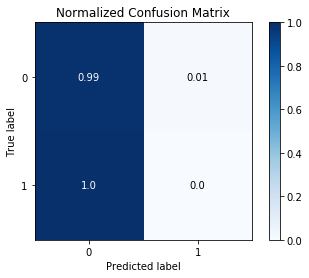

In [124]:
skplt.metrics.plot_confusion_matrix(test.iloc[:,-1:].values, clf.predict(test.iloc[:,:-1].values),
                                    normalize=True)
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test.iloc[:,-1:].values, pred)

array([[242,   2],
       [ 73,   0]])

In [22]:
from sklearn.metrics import classification_report
target_names = {'Normal', 'Accident'}
print(classification_report(test.iloc[:,-1:].values, pred, target_names = target_names))

              precision    recall  f1-score   support

    Accident       0.77      0.99      0.87       244
      Normal       0.00      0.00      0.00        73

   micro avg       0.76      0.76      0.76       317
   macro avg       0.38      0.50      0.43       317
weighted avg       0.59      0.76      0.67       317



# Use ROC to evaluation SVM performance 

In [27]:
from sklearn.metrics import roc_auc_score

In [28]:
prob_y = clf.predict_proba(test.iloc[:,:-1].values)

In [32]:
# Keep only the positive class
prob_y = [p[1] for p in prob_y]

In [33]:
prob_y[:5] # Example

[0.19916909898791835,
 0.19969442868856624,
 0.19787278802302316,
 0.19738948198727943,
 0.209514690430095]

In [34]:
print( roc_auc_score(test.iloc[:,-1:].values, prob_y) )

0.5437345609701325


/usr/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


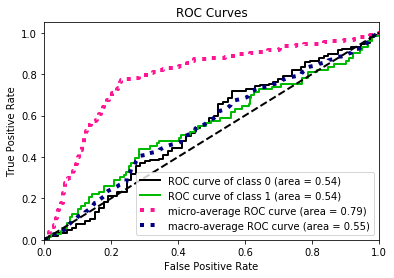

In [37]:
import scikitplot as skplt
import matplotlib.pyplot as plt

#y_true = # ground truth labels
#y_probas = # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(test.iloc[:,-1:].values, clf.predict_proba(test.iloc[:,:-1].values))
plt.show()

# Logistic regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [44]:
#train,test = train_test_split(df_all, test_size=0.2)

In [45]:
train.tot_accidents.value_counts()

0    1000
1     264
Name: tot_accidents, dtype: int64

In [46]:
# Separate input features (X) and target variable (y)
y = train.tot_accidents 
X = train.drop('tot_accidents', axis=1)

In [47]:
# Train model
clf_2 = LogisticRegression(solver='liblinear').fit(X, y)

In [48]:
# Predict on training set
pred_y_2 = clf_2.predict(X)

In [50]:
print( accuracy_score(pred_y_2, y) )

0.7879746835443038


In [51]:
import numpy as np
print( np.unique( pred_y_2 ) )

[0 1]


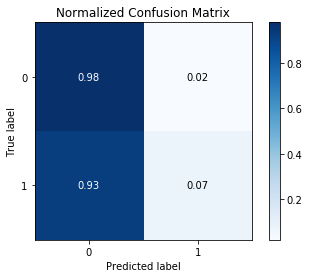

In [123]:
skplt.metrics.plot_confusion_matrix(test.iloc[:,-1:].values, clf_2.predict(test.iloc[:,:-1].values),
                                    normalize=True)
plt.show()

# Use ROC to evaluate logistic model performance

In [57]:
# Predict class probabilities
prob_y_2 = clf_2.predict_proba(test.iloc[:,:-1].values)

In [58]:
# Keep only the positive class
prob_y_2 = [p[1] for p in prob_y_2]

In [59]:
prob_y_2[:5] # Example

[0.14854458596537978,
 0.22315045863395142,
 0.2015864948133292,
 0.27107669266049883,
 0.36929908019898805]

In [61]:
print( roc_auc_score(test.iloc[:,-1:].values, prob_y_2) ) 

0.6597799236469796


/usr/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


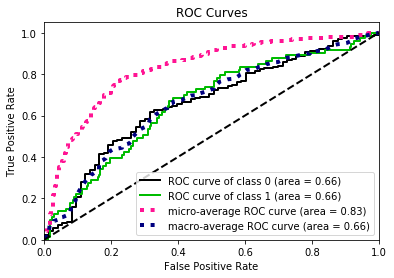

In [56]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(test.iloc[:,-1:].values, clf_2.predict_proba(test.iloc[:,:-1].values))
plt.show()

# Up-sample Minority Class

In [62]:
#import the resampling module from Scikit-Learn
from sklearn.utils import resample

In [63]:
# Separate majority and minority classes
df_majority = train[train.tot_accidents==0]
df_minority = train[train.tot_accidents==1]

In [64]:
train.tot_accidents.value_counts()

0    1000
1     264
Name: tot_accidents, dtype: int64

In [65]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1000,    # to match majority class
                                 random_state=123) # reproducible results

In [66]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [67]:
df_upsampled.tot_accidents.value_counts()

1    1000
0    1000
Name: tot_accidents, dtype: int64

# Downsample test data 

In [68]:
# Separate majority and minority classes
test_majority = test[test.tot_accidents==0]
test_minority = test[test.tot_accidents==1]

In [69]:
test.tot_accidents.value_counts()

0    244
1     73
Name: tot_accidents, dtype: int64

In [70]:
# Downsample majority class
test_majority_downsampled = resample(test_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=73,     # to match minority class
                                 random_state=123) # reproducible results

In [71]:
# Combine minority class with downsampled majority class
test_balanced = pd.concat([test_majority_downsampled, test_minority])

In [72]:
# Display new class counts
test_balanced.tot_accidents.value_counts()
# 1    49
# 0    49
# Name: balance, dtype: int64

1    73
0    73
Name: tot_accidents, dtype: int64

# Separate input features (X) and target variable (y)

In [106]:
y_new = df_upsampled.tot_accidents
X_new = df_upsampled.drop('tot_accidents', axis=1)

# Train logistic model on upsampled dataset

In [84]:
# Train model
clf_3 = LogisticRegression().fit(X_new, y_new)
 
# Predict on test set
pred_y_3 = clf_3.predict(test_balanced.iloc[:,:-1].values)

# Is our model still predicting just one class?
print( np.unique( pred_y_3 ) )

[0 1]


In [85]:
# How's our accuracy?
print( accuracy_score(test_balanced.iloc[:,-1:].values, pred_y_3) )

0.636986301369863


# Use ROC to evalute logistic regression performance after sampling

In [89]:
# Predict class probabilities
prob_y_3 = clf_3.predict_proba(test_balanced.iloc[:,:-1].values)

In [90]:
# Keep only the positive class
prob_y_3 = [p[1] for p in prob_y_3]

In [91]:
prob_y_3[:3] # Example

[0.6090582688716618, 0.3583574725473958, 0.6621958157514951]

In [92]:
print( roc_auc_score(test_balanced.iloc[:,-1:].values, prob_y_3) )

0.6549071120285231


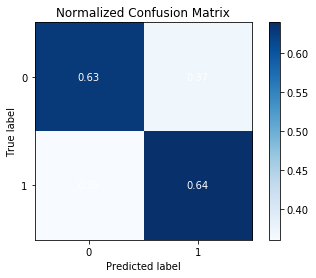

In [122]:
skplt.metrics.plot_confusion_matrix(test_balanced.iloc[:,-1:].values, clf_3.predict(test_balanced.iloc[:,:-1].values),
                                    normalize=True)
plt.show()

/usr/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


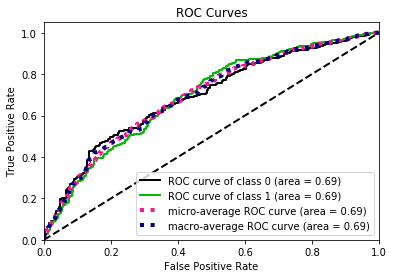

In [93]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(y_test, clf_3.predict_proba(X_test))
plt.show()

# Train SVM Model on new balanced dataset

In [94]:
from sklearn import svm
# create and configure model
clf_4 = svm.SVC(gamma='scale', probability=True)
# fit model
clf_4.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [96]:
# How's our accuracy?
print( accuracy_score(test_balanced.iloc[:,-1:].values, clf_4.predict(test_balanced.iloc[:,:-1].values)) )

0.5958904109589042


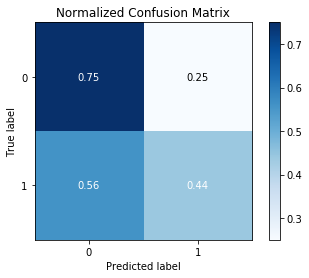

In [119]:
skplt.metrics.plot_confusion_matrix(test_balanced.iloc[:,-1:].values, clf_4.predict(test_balanced.iloc[:,:-1].values),
                                    normalize=True)
plt.show()

# Use ROC to evalute SVM performance after sampling

In [121]:
# Predict class probabilities
prob_y_4 = clf_4.predict_proba(test_balanced.iloc[:,:-1].values)
 
# Keep only the positive class
prob_y_4 = [p[1] for p in prob_y_4]
 
prob_y_4[:5] # Example

print( roc_auc_score(test_balanced.iloc[:,-1:].values, prob_y_4) )

0.6121223494088948


# Use Tree-Based Algorithms

In [98]:
from sklearn.ensemble import RandomForestClassifier

# Use a Random Forest on the original imbalanced dataset

In [99]:
# Train model
clf_5 = RandomForestClassifier()
clf_5.fit(X, y)

/usr/lib64/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [100]:
# Predict on test set
pred_y_5 = clf_5.predict(test.iloc[:,:-1].values)

In [101]:
# Is our model predicting just one class?
print( np.unique( pred_y_5 ) )
# [0 1]

[0 1]


In [102]:
# How's our accuracy?
print( accuracy_score(test.iloc[:,-1:].values, pred_y_5) )

0.722397476340694


In [116]:
# What about AUROC?
prob_y_5 = clf_5.predict_proba(test.iloc[:,:-1].values)
prob_y_5 = [p[1] for p in prob_y_5]
print( roc_auc_score(test.iloc[:,-1:].values, prob_y_5) )

0.5676510217830676


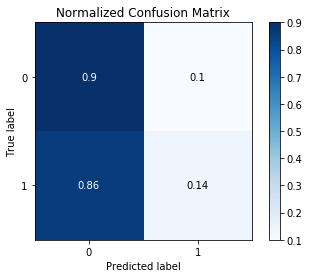

In [117]:
skplt.metrics.plot_confusion_matrix(test.iloc[:,-1:].values, pred_y_5, normalize=True)
plt.show()

/usr/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


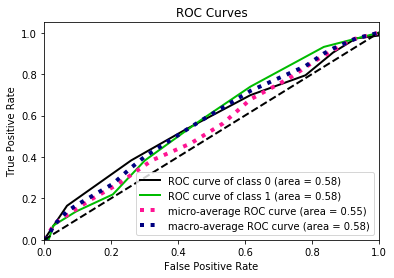

In [112]:
skplt.metrics.plot_roc_curve(test_balanced.iloc[:,-1:].values, clf_5.predict_proba(test_balanced.iloc[:,:-1].values))
plt.show()

# Use a Random Forest on the new balanced dataset

In [107]:
clf_6 = RandomForestClassifier()
clf_6.fit(X_new, y_new)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [108]:
# Predict on test set
pred_y_6 = clf_6.predict(test_balanced.iloc[:,:-1].values)

In [109]:
print( np.unique( pred_y_6 ) )
# [0 1]

[0 1]


In [110]:
# How's our accuracy?
print( accuracy_score(test_balanced.iloc[:,-1:].values, pred_y_6) )

0.5273972602739726


In [111]:
# What about AUROC?
prob_y_6 = clf_6.predict_proba(test_balanced.iloc[:,:-1].values)
prob_y_6 = [p[1] for p in prob_y_6]
print( roc_auc_score(test_balanced.iloc[:,-1:].values, prob_y_6) )

0.5745918558829048


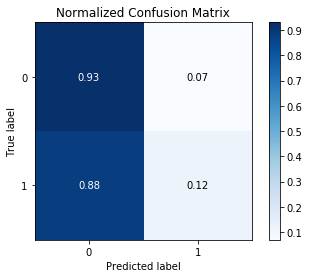

In [114]:
skplt.metrics.plot_confusion_matrix(test_balanced.iloc[:,-1:].values, pred_y_6, normalize=True)
plt.show()

/usr/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


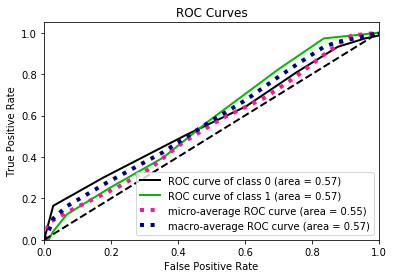

In [113]:
skplt.metrics.plot_roc_curve(test_balanced.iloc[:,-1:].values, clf_6.predict_proba(test_balanced.iloc[:,:-1].values))
plt.show()

# Run model on trip_metrics

In [ ]:
metrics_data = pd.read_csv("trip_metrics.csv", header=0)
metrics_data = metrics_data.drop(["trip_metrics.vintype", "trip_metrics.subtype", "start_day"], axis=1)

metrics_data.fillna(0, inplace=True)

print(metrics_data.shape)

metrics_data.head()


In [ ]:
metrics_data = metrics_data.groupby("vin", as_index=False).median()

print(metrics_data.shape)

metrics_data.head()

In [ ]:
df_trip = pd.merge(metrics_data, claim_new, on='vin', how='inner')

print(df_trip.shape)

df_trip.head()

In [ ]:
df_trip.to_csv("metrics_and_claims.csv", header=True, index=False)

df_trip = df.drop("vin", axis=1)

df_trip.columns

In [ ]:
df_trip.count()

In [ ]:
df_trip[df_trip['tot_accidents']>0].count()

In [ ]:
from sklearn.model_selection import train_test_split
train_trip,test_trip = train_test_split(df_trip, test_size=0.2)
train_trip.count()

In [ ]:
test_trip.count()

In [ ]:
test_trip.iloc[0:2,-1:]

In [ ]:
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf.fit(train_trip.iloc[:,:-1].values, train_trip.iloc[:,-1:].values)

In [ ]:
from sklearn.metrics import accuracy_score
pred = clf.predict(test_trip.iloc[:,:-1].values)
accuracy_score(test_trip.iloc[:,-1:].values, pred)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_trip.iloc[:,-1:].values, pred)

In [ ]:
from sklearn.metrics import classification_report
target_names = {'Normal', 'Accident'}
print(classification_report(test_trip.iloc[:,-1:].values, pred, target_names = target_names))